In [4]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2
import data.loader.dataload as ds
import model.models
import scipy.spatial.distance as ssdist
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd
from pydub import AudioSegment as auseg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
torch.cuda.empty_cache()

### Loading the dataset

set up dataloader

In [65]:
# path = '/home/ubuntu/datasets/processed/mixer/2-20000-2/test';
path = '/work/tianjunm/dataset/processed/datagen/t0-2s-5c/test.csv';

# d = ds.SignalDataset(root_dir=path, transform=ds.Concat(size=(129, 231), encdec=True))
# d = ds.SignalDataset(root_dir=new, transform=ds.ToTensor(size=(129, 690)))
d = ds.MixtureDataset(num_sources=2, data_path=path, transform=ds.Wav2Spect('Concat', enc_dec=True))

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_s

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct 

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/1

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...


  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Co

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/1

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...


  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Succ

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tian

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Succes

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]


<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Check

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 


<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_si

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tia

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/80 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tia

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_norm

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/Wild

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/1600

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/80 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_nor

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_nor

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/p

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]


<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datas

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...


  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laught

<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Co

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Check

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ..

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking

<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_c

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/80 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

  0%|          | 0/52 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the int

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_sir

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<S

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/69 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ..

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/80 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integ

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

  0%|          | 0/52 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the int

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Check

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...


  0%|          | 0/80 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalize

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxopho

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_

<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integ

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data 

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/28 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: C

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the i

<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_sir

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/lar

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the int

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the d

  0%|          | 0/75 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/poli

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /wo

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

  0%|          | 0/77 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_no

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/1600

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data 

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /wor

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Ch

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the i

<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_norm

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_no

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

  0%|          | 0/69 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <c

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_no

<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laught

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of th

<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/1600

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<St

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/52 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the int

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the d

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data i

<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking 

<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/poli

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildM

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normaliz

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ..

<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data 

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_no

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

  0%|          | 0/50 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laught

<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of th

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the d

<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_normalized

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/car.csd ...
<Status>: Checking the integrit

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Check

<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking t

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_160

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence rea

  0%|          | 0/77 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_normalized

<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/car.csd ...
<Status>: Checking the integrit

<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational s

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_cs

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ..

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking

<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Ch

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the da

<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_nor

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read f

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of t

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_norm

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking 

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/shaver.csd ...
<Status>: Checking 

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the in

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checki

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_n

  0%|          | 0/77 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the d

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_normalized

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the da

<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/shaver.csd ...
<Status>: Checking 

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalize

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the integrity

  0%|          | 0/28 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...
<Status>: 

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/rain.csd ...
<Status>: Checking the integrity of the

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cowbell.

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integ

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tearin

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of th

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data i

<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the da

<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/banjo.csd ...
<Status>: Check

<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/piano.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/wind.csd ...
<Status>: Ch

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/frying.csd ...
<Status>: Checking

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of the data i

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the da

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/shaver.csd ...
<Status>: Checking 

<Success>: <cut_normalized_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine_idling> computational sequence ...
<Success>: <cut_normalized_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/large_datasets/WildMix/audio_csd/cut_normalized/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


In [66]:
dataloader = torch.utils.data.DataLoader(d, batch_size=128, shuffle=False)

In [67]:
for i, info in enumerate(dataloader):
    print(i)
    aggregate = info['aggregate']
    ground_truths_in = info['ground_truths_in']
    ground_truths_gt = info['ground_truths_gt']
    classes = info['category_names']
    break
_, seq_len, input_dim = aggregate.shape
print(aggregate.shape)
print(ground_truths_in.shape)
print(ground_truths_gt.shape)

clip: 19913
32000
mix: 32000
clip: 17161
32000
mix: 32000
clip: 23659
32000
mix: 32000
clip: 20157
32000
mix: 32000
clip: 18632
32000
mix: 32000
clip: 21770
32000
mix: 32000
clip: 16379
32000
mix: 32000
clip: 20126
32000
mix: 32000
clip: 19195
32000
mix: 32000
clip: 16291
32000
mix: 32000
clip: 23082
32000
mix: 32000
clip: 20605
32000
mix: 32000
clip: 18222
32000
mix: 32000
clip: 19390
32000
mix: 32000
clip: 22970
32000
mix: 32000
clip: 21859
32000
mix: 32000
clip: 18038
32000
mix: 32000
clip: 21466
32000
mix: 32000
clip: 17947
32000
mix: 32000
clip: 23261
32000
mix: 32000
clip: 21392
32000
mix: 32000
clip: 17590
32000
mix: 32000
clip: 20925
32000
mix: 32000
clip: 16531
32000
mix: 32000
clip: 23890
32000
mix: 32000
clip: 23407
32000
mix: 32000
clip: 16853
32000
mix: 32000
clip: 22320
32000
mix: 32000
clip: 23149
32000
mix: 32000
clip: 22936
32000
mix: 32000
clip: 16057
32000
mix: 32000
clip: 20495
32000
mix: 32000
clip: 22580
32000
mix: 32000
clip: 20596
32000
mix: 32000
clip: 23291
32

In [68]:
aggregate.max()

tensor(426615.1250)

In [69]:
classes[0][2]

'engine.csd'

In [71]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)
    
def get_spect(data, fs, nperseg, noverlap):
    r = np.split(data.numpy().T, 2)[0]
    i = np.split(data.numpy().T, 2)[1]
    c = r + 1j * i
    
    rev = scipy.signal.istft(c, fs=fs, nperseg=nperseg, noverlap=noverlap)
    return c, rev

def get_gt_spect(ground_truths_gt, ground_truths_in, fs, nperseg, noverlap, xid=0):
    _, seq_len, nsource, input_dim = ground_truths_gt.shape
    
    c_gts = []
    c_ins = []
    revs = []
    for i in range(nsource):
        gt = ground_truths_gt[xid, :, i]
        gt_in = ground_truths_in.view(-1, seq_len+1, nsource, input_dim)[xid, :, i]
        c_gt, rev = get_spect(gt, fs, nperseg, noverlap)
        c_in, _ = get_spect(gt_in, fs, nperseg, noverlap)

        c_gts.append(c_gt)
        c_ins.append(c_in)
        revs.append(rev)
    
    return c_gts, c_ins, revs

visualize sample data

In [72]:
xid = 2
nsource = 2
fs = 16000
nperseg = 256
noverlap = nperseg // 4

c_agg, agg_data = get_spect(aggregate[xid], fs=fs, nperseg=nperseg, noverlap=noverlap)
c_gts, c_ins, revs = get_gt_spect(ground_truths_gt, ground_truths_in, fs, nperseg, noverlap, xid)

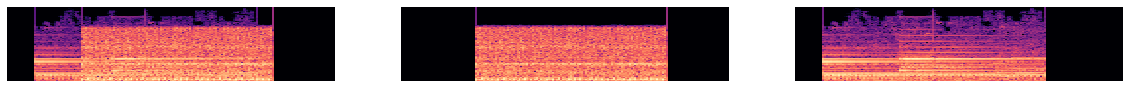

In [73]:

fig = plt.figure(figsize=(20, 3))
cs = [c_agg] + c_gts
for i, c in enumerate(cs):
    plt.subplot(2, 3, i + 1)
    display(c, fs)
    plt.axis('off')


In [74]:
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt

# _, rdata = scipy.signal.istft(c, fs=44100, nfft = 256)
# IPython.display.Audio(data=rdata, rate=44100)

transformer model

In [10]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

cuda:3


In [ ]:
512,3,4,128,64
512,4,4,128,128,
VTF,euclidean,2-20000-2,Min,1,72,400,0.001,Adam,128,0.5,0.0,0.9,0.99,1e-09,512,16,16,4,4,128,128,8.758085429668427,/home/ubuntu/multimodal-listener/results/2-20000-2_euclidean_VTF_Min_190723/config_0/snapshots/best.tar,0.05


In [11]:
import model.transformer
_, seq_len, freq_range = aggregate.shape
print(seq_len)
print(freq_range)
net = model.transformer.make_model(freq_range, num_sources=2, N=2, d_model=128, d_ff=256, h=2,dropout=0.5).to(device)
checkpoint = torch.load('/home/ubuntu/experiment_logs/results/2-20000-2_euclidean_VTF_190727_2-s_5-c/config_0/snapshots/best.tar')

net.load_state_dict(checkpoint['model_state_dict'])
# checkpoint


460
258


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [12]:
from torch.autograd import Variable
subseq_mask = model.transformer.subsequent_mask(ground_truths_in.shape[1])
subseq_mask = Variable(subseq_mask).type_as(aggregate.data).to(device)

In [13]:
print(subseq_mask.shape)
# plt.figure(figsize=(5,5))
# plt.imshow(subseq_mask.cpu()[0])

torch.Size([1, 461, 461])


In [16]:
out = net(aggregate.to(device), ground_truths_in.to(device), None, subseq_mask.to(device))

aggregate

In [75]:
IPython.display.Audio(data=revs[1], rate=fs)

predicted separations

In [76]:
IPython.display.Audio(data=revs[0], rate=fs)

In [77]:
IPython.display.Audio(data=agg_data, rate=fs)

### Greedy decoding

In [34]:
seps = model.transformer.greedy_decoder(net, aggregate.to(device), seq_len, 2, freq_range, device)

In [35]:
print(seps.shape)
# pp = seps.view(-1, seq_len, 2, 258)
pp = torch.split(seps, 258, dim=-1)
oo = torch.stack(pp, dim=2)
print(oo.shape)

torch.Size([128, 460, 516])
torch.Size([128, 460, 2, 258])


In [36]:
def get_pred_spect(pp, num_sources, xid=0):
    cs = []
    for i in range(num_sources):
        g = pp[xid, :, i, :].cpu().numpy().T
        r = np.split(g, 2)[0]
        i = np.split(g, 2)[1]
        c = r + 1j * i
        cs.append(c)
    return cs

def get_pred_spect(ground_truths_gt, fs, nperseg, noverlap, xid=0):
    _, seq_len, nsource, input_dim = ground_truths_gt.shape
    
    c_gts = []
    revs = []
    for i in range(nsource):
        gt = ground_truths_gt[xid, :, i].cpu()
        c_gt, rev = get_spect(gt, fs, nperseg, noverlap)

        c_gts.append(c_gt)
        revs.append(rev)
    
    return c_gts, revs

def plot_cs(cs, dim):
    fig = plt.figure(figsize=(20, 3))
    cs = [c_agg] + cs
    for i, c in enumerate(cs):
        plt.subplot(dim[0], dim[1], i + 1)
        display(c, 22050)
        plt.axis('off')

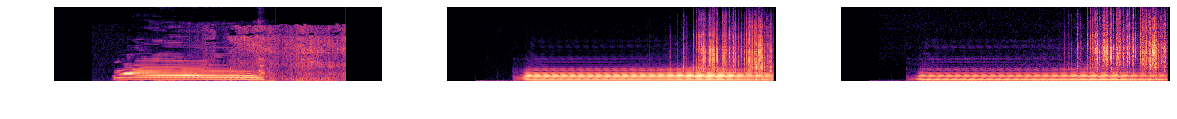

In [37]:
# cs = get_pred_spect(pp, 2, xid=0)
cs, revvs = get_pred_spect(oo, fs, nperseg, noverlap, xid)
plot_cs(cs, dim=(2, 3))

### random experiments

In [ ]:
a = torch.arange(12).view(4, 3)
a1 = a[:2].view(-1, 3)
a2 = a[2:].view(-1, 3)

print(a1)
print(a2)

print(torch.cat([a1, a2]))
print(torch.cat([a1, a2]).shape)
# print(a.sha)

In [ ]:
aa = torch.arange(12.).view(3, 4)
a = aa.view(4, 3)
# b = torch.ones(4, 3).copy_(a)
b = torch.cat([torch.ones(3).view(1,3), a])

print(aa)
print(a)
print(b)
aa.fill_(10)
print(a)
print(b)


In [ ]:
torch.ones(2, 3)
torch.zeros(2, 3)

In [ ]:

def check(m_c, m):
    for i in range(m_c.shape[0]):
        for j in range(m_c.shape[1]):
            batch = i // m.shape[1]
            ii = i % m.shape[1]
            assert(m_c[i][j] == m[batch][ii][j])
    print("passed")

check(agg_concat, agg)